
<div dir=rtl >
<h1>قوانین انجمنی</h1>

قوانین انجمنی روابط و وابستگی‌های متقابل بین مجموعه بزرگی از اقلام داده‌ای را نشان می‌دهند. 

مثال متداول در رابطه با کشف قوانین انجمنی "تحلیل سبد خرید" است.  در این فرایند با توجه به اقلام مختلفی که مشتریان در سبد خریدشان قرار می‌دهند، عادات و رفتار خرید مشتریان مورد تحلیل قرار می‌گیرد و می‌توان با شناسایی ارتباط بین محصولات، الگوهای تکرار شونده در حین خرید را بدست آورد.

سه پارامتر مهم:
- Support  میزان محبوبیت یک مجموعه آیتم را با توجه به دفعات حضور در تراکنش‌ها نشان می‌دهد.
- Confidence  احتمال خرید آیتم y در صورت خرید آیتم x را نشان می‌دهد. x -> y
- Lift   ترکیب دو پارامتر بالا می‌باشد.

برای پیاده سازی قوانین انجمنی در این تمرین، از الگوریتم Apriori که یکی از محبوب‌ترین و کارآمدترین الگوریتم‌های این حوزه است استفاده می‌کنیم.


<font color='Green'> پرسش:  تاثیر مقادیر مختلف پارامتر Lift را در احتمال وقوع نتیجه بررسی کنید.  </font>


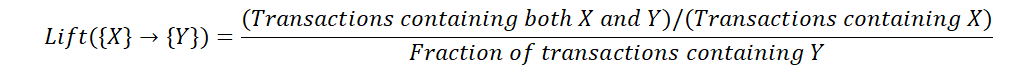


<font color='White'> 

این رابطه نشان می‌دهد که در هنگام خرید آیتم X چقدر احتمال دارد که آیتم Y خریداری شود، و همزمان میزان محبوبیت آیتم Y را کنترل می‌کند. اگر برابر با 1 باشد به معنای عدم ارتباط بین آیتم ها است. لیفت بزرگتر از 1 به این معنی است که در صورت خرید آیتم X احتمال خرید کالای Y وجود دارد، در حالی که مقدار کمتر از 1 به این معنی است که در صورت خرید کالای X، احتمال خرید کالای Y بعید است.
  </font>



</div>





<div dir=rtl >
<h1>الگوریتم Apriori</h1>

روش کار الگوریتم به این صورت است که یک  حداقل مقدار پشتیبانی در نظر گرفته    می‌شود و تکرارها با مجموعه آیتم‌های مکرر اتفاق می‌افتند. در صورتیکه  مجموعه‌ها و زیرمجموعه‌ها مقدار پشتیبانی کمتر از حد آستانه داشته باشند حذف می‌شوند. این روند تا زمانیکه امکان حذف وجود نداشته باشد ادامه می‌یابد. 

در این بخش از تمرین می‌خواهیم الگوریتم apriori را بر روی مجموعه داده Hypermarket_dataset که شامل سفارشات خرید افراد از فروشگاه های مواد غذایی است اعمال کنیم.


</div>





<div dir=rtl >
<h1>آماده‌سازی داده</h1>

<font color='Green'>پرسش: برای شروع کار باید داده‌های دیتاست را در قالب ماتریس پراکنده که محصولات  خریداری شده در ستون‌ و شماره سفارشات خرید به عنوان شاخص (index) هستند آماده کنید. 


برای راحتی کار محصولات خریداری شده در هر سفارش را با اعداد 0,1 کدگذاری کنید.

 نمونه ماتریس خروجی شما:

<img src="https://drive.google.com/uc?id=1eD0jan1ZbeYqSklgK--ks7oeY-MyTA3p"></img>

</div>




In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [53]:
from mlxtend.preprocessing import TransactionEncoder
df = pd.read_csv('Hypermarket_dataset.csv')
df.sort_values(["Member_number"],axis=0, ascending=True,inplace=True,na_position='first')
# print(df[70:100])
list1 = df.values.tolist()
iterated = 1000
matrix = []
matrix.append([])
for t in list1:
  item = t[2]
  # member number iterated
  if t[0] == iterated:
    matrix[-1].append(item)
    # member number not iterated
  else:
    matrix.append([item])
    iterated = t[0]
# print(matrix)

te = TransactionEncoder()
te_ary = te.fit(matrix).transform(matrix).astype("int")
final_df = pd.DataFrame(te_ary, columns=te.columns_)
print(final_df[:5])

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      0         0                 0                 0   
1                      0         0                 0                 0   
2                      0         0                 0                 0   
3                      0         0                 0                 0   
4                      0         0                 0                 0   

   baby cosmetics  bags  baking powder  bathroom cleaner  beef  berries  ...  \
0               0     0              0                 0     0        0  ...   
1               0     0              0                 0     1        0  ...   
2               0     0              0                 0     0        0  ...   
3               0     0              0                 0     0        0  ...   
4               0     0              0                 0     0        0  ...   

   turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0 


<div dir=rtl >
<h1>شناسایی الگوهای پر تکرار</h1>

<font color='Green'> پرسش:  با اعمال الگوریتم apriori و به ازای مقدار min_support = 0.07 تمامی الگوهای پر تکرار را تولید نمایید. 

</div>




In [54]:
# your code here
frq_items = apriori(final_df, min_support = 0.07, use_colnames = True)
frq_items

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whipped/sour cream, whole milk)"
80,0.150590,"(yogurt, whole milk)"
81,0.082093,"(other vegetables, rolls/buns, whole milk)"



<div dir=rtl >
<h1>استخراج قوانین انجمنی</h1>


<font color='Green'> پرسش: تابعی بنویسید که با گرفتن دو ورودی confidence و lift قوانین انجمنی حاصل را در خروجی نشان دهد. </br>
برای دو حالت خروجی خود را در گزارش ثبت کنید.


</div>




In [55]:
# your code here
def get_rules(lift, confidence):
    rules = association_rules(frq_items, metric="lift", min_threshold=lift)
    print(rules)
    rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    return rules[(rules['confidence'] > confidence)]

get_rules(0.1, 0.1)

                       antecedents                     consequents  \
0                     (whole milk)                  (bottled beer)   
1                   (bottled beer)                    (whole milk)   
2               (other vegetables)                 (bottled water)   
3                  (bottled water)              (other vegetables)   
4                     (rolls/buns)                 (bottled water)   
..                             ...                             ...   
93  (other vegetables, whole milk)                        (yogurt)   
94            (yogurt, whole milk)              (other vegetables)   
95              (other vegetables)            (yogurt, whole milk)   
96                        (yogurt)  (other vegetables, whole milk)   
97                    (whole milk)      (other vegetables, yogurt)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.458184            0.158799  0.085428    0.186450  1.174124   
1  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
86,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
70,(shopping bags),(whole milk),0.168291,0.458184,0.091329,0.542683,1.184422,0.014220,1.184772
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
84,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
...,...,...,...,...,...,...,...,...,...
91,(whole milk),"(other vegetables, rolls/buns)",0.458184,0.146742,0.082093,0.179171,1.220996,0.014859,1.039508
83,(whole milk),(whipped/sour cream),0.458184,0.154695,0.079785,0.174132,1.125650,0.008906,1.023536
20,(whole milk),(newspapers),0.458184,0.139815,0.072345,0.157895,1.129310,0.008284,1.021469
97,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235


In [56]:
get_rules(0.4, 0.4)

                       antecedents                     consequents  \
0                     (whole milk)                  (bottled beer)   
1                   (bottled beer)                    (whole milk)   
2               (other vegetables)                 (bottled water)   
3                  (bottled water)              (other vegetables)   
4                     (rolls/buns)                 (bottled water)   
..                             ...                             ...   
93  (other vegetables, whole milk)                        (yogurt)   
94            (yogurt, whole milk)              (other vegetables)   
95              (other vegetables)            (yogurt, whole milk)   
96                        (yogurt)  (other vegetables, whole milk)   
97                    (whole milk)      (other vegetables, yogurt)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.458184            0.158799  0.085428    0.186450  1.174124   
1  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
86,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
70,(shopping bags),(whole milk),0.168291,0.458184,0.091329,0.542683,1.184422,0.014220,1.184772
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
84,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
9,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
67,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
